Bài tập: Phân tích hoạt động kinh doanh siêu thị
Giả sử các bạn cần mở một siêu thị, và cần phân tích về các ngành hàng mà mình sẽ mở.
Giả sử các bạn lấy được thông tin kinh doanh của một siêu thị gần địa điểm định mở là
https://www.kaggle.com/aungpyaeap/supermarket-sales

Các bạn thử làm bài tập như sau nhé
1. Thống kê tổng giá trị bán ra (Tính sum Cột Total) theo dòng sản phẩm (Product line) và theo từng ngày trong năm
2. Thông kê lượng tiền qua các hình thức thanh toán

# 0. Khai báo các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Đọc file CSV

In [2]:
df = pd.read_csv("supermarket_sales - Sheet1.csv", encoding = "ISO-8859-1")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# 2. Thống kê tổng giá trị bán ra theo dòng sản phẩm

In [5]:
df["Product line"].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [6]:
# Chuyển đổi định dạng ngày tháng
df.Date = pd.to_datetime(df.Date, infer_datetime_format=True)
df.Date = df.Date.dt.date

In [7]:
# lấy ra dataframe chỉ chứa hai giá trị cột "Product line" & "Total"
df1 = df.loc[:, ["Product line", "Total", "Date"]]

In [8]:
df1.head()

,Product line,Total,Date
0,Health and beauty,548.9715,2019-01-05
1,Electronic accessories,80.2200,2019-03-08
2,Home and lifestyle,340.5255,2019-03-03
3,Health and beauty,489.0480,2019-01-27
4,Sports and travel,634.3785,2019-02-08


In [9]:
df1_s = df1.groupby(["Product line"]).sum()

In [10]:
df1_s

,Total
Product line,
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Food and beverages,56144.8440
Health and beauty,49193.7390
Home and lifestyle,53861.9130
Sports and travel,55122.8265


In [11]:
# Giá trị trục x
x = df1_s.index.get_level_values(0)

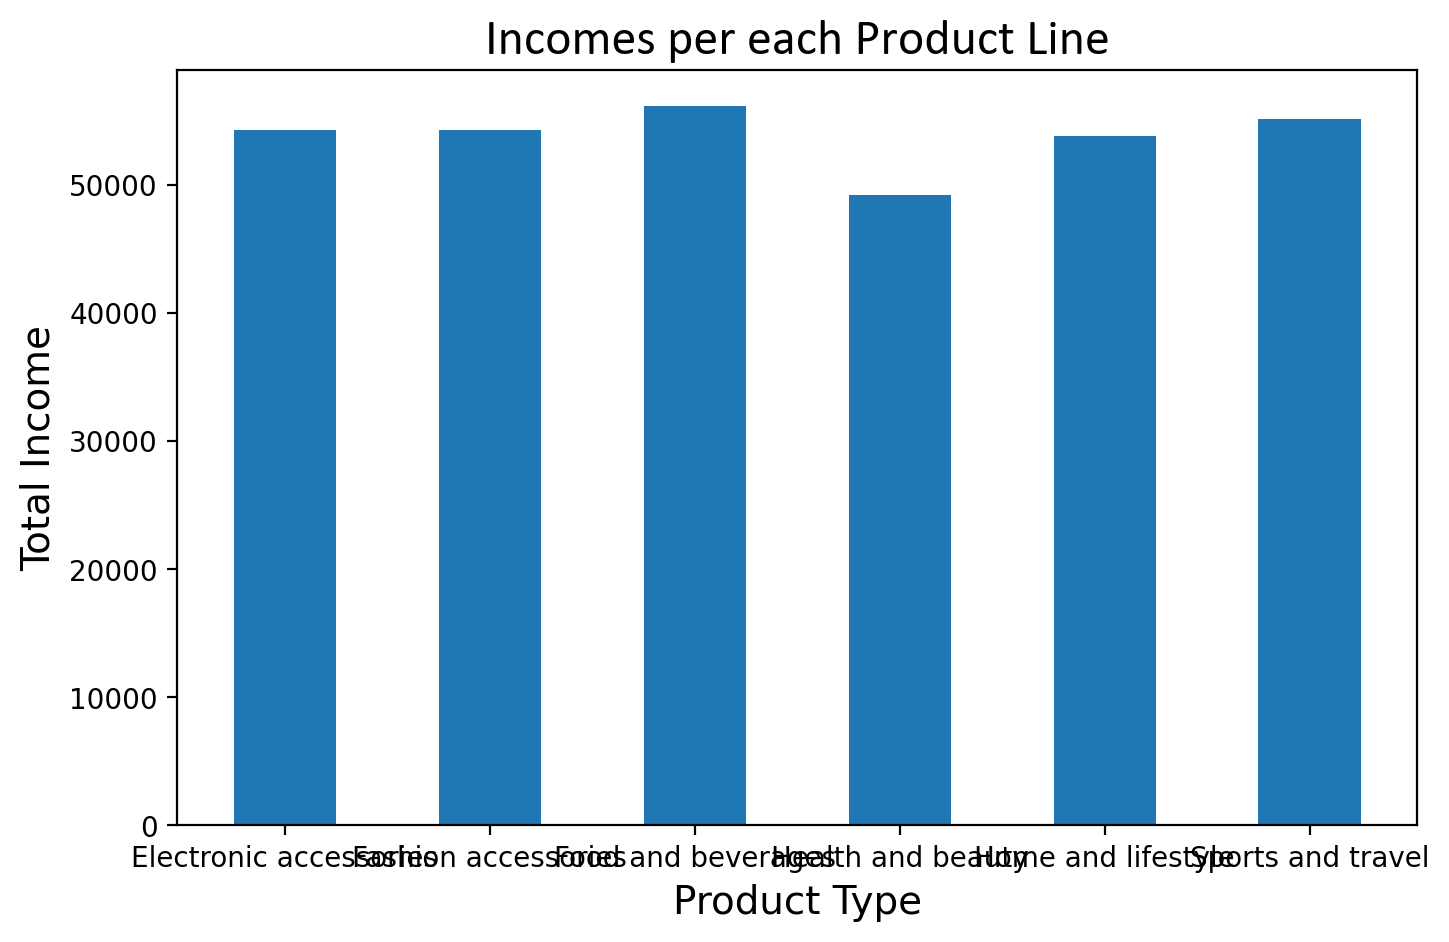

In [12]:
# Vẽ biểu đồ cột
plt.figure(figsize = (8, 5), dpi = 200)
plt.bar(x, df1_s.Total, width = 0.5)
plt.title("Incomes per each Product Line", fontsize = 18, font = "calibri")
plt.xlabel("Product Type", fontsize = 14)
plt.ylabel("Total Income", fontsize = 14)
plt.show()

Nhận xét:
- Các dòng sản phẩm đều có tổng giá trị bán ra xấp xỉ nhau ~50,000 USD
- Trong đó:
    - Tổng giá trị của "Food and beverages" là lớn nhất.
    - Tổng giá trị của "Health and beauty" là nhỏ nhất.

# 2. Thống kê tổng giá trị bán ra theo dòng sản phẩm và theo từng ngày trong năm

In [13]:
len(df1.Date.unique())

89

In [14]:
df1["Product line"].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [15]:
# sắp xếp dữ liệu của df1 theo thứ tự tăng dần
df1.sort_values(by = ["Date"], ascending = True, inplace = True, ignore_index = True)

In [16]:
df1

,Product line,Total,Date
0,Food and beverages,177.408,2019-01-01
1,Fashion accessories,621.243,2019-01-01
2,Home and lifestyle,399.756,2019-01-01
3,Sports and travel,113.568,2019-01-01
4,Health and beauty,132.027,2019-01-01
...,...,...,...
995,Health and beauty,918.729,2019-03-30
996,Fashion accessories,85.512,2019-03-30
997,Electronic accessories,304.983,2019-03-30
998,Sports and travel,469.770,2019-03-30


In [17]:
temp = df1.groupby(["Product line", "Date"]).sum()

In [18]:
temp

Total
Product line           Date                 
Electronic accessories 2019-01-01  1382.7450
                       2019-01-02   138.6630
                       2019-01-04   705.6210
                       2019-01-05   690.0180
                       2019-01-07   326.4240
...                                      ...
Sports and travel      2019-03-24   207.2175
                       2019-03-25   195.9510
                       2019-03-26    41.0760
                       2019-03-27   588.3570
                       2019-03-30   765.4605

[454 rows x 1 columns]

In [19]:
# Tách giá trị mặt hàng "Electronic accessories"
df1 = temp.loc["Electronic accessories",:]
x1 = df1.index.get_level_values(0)
y1 = df1.Total

In [20]:
# Tách giá trị mặt hàng "Health and beauty"
df2 = temp.loc["Health and beauty",:]
x2 = df2.index.get_level_values(0)
y2 = df2.Total

In [21]:
# Tách giá trị mặt hàng "Home and lifestyle"
df3 = temp.loc["Home and lifestyle",:]
x3 = df3.index.get_level_values(0)
y3 = df3.Total

In [22]:
# Tách giá trị mặt hàng "Sports and travel"
df4 = temp.loc["Sports and travel",:]
x4 = df4.index.get_level_values(0)
y4 = df4.Total

In [23]:
# Tách giá trị mặt hàng "Food and beverages"
df5 = temp.loc["Food and beverages",:]
x5 = df5.index.get_level_values(0)
y5 = df5.Total

In [24]:
# Tách giá trị mặt hàng "Fashion accessories"
df6 = temp.loc["Fashion accessories",:]
x6 = df5.index.get_level_values(0)
y6 = df5.Total

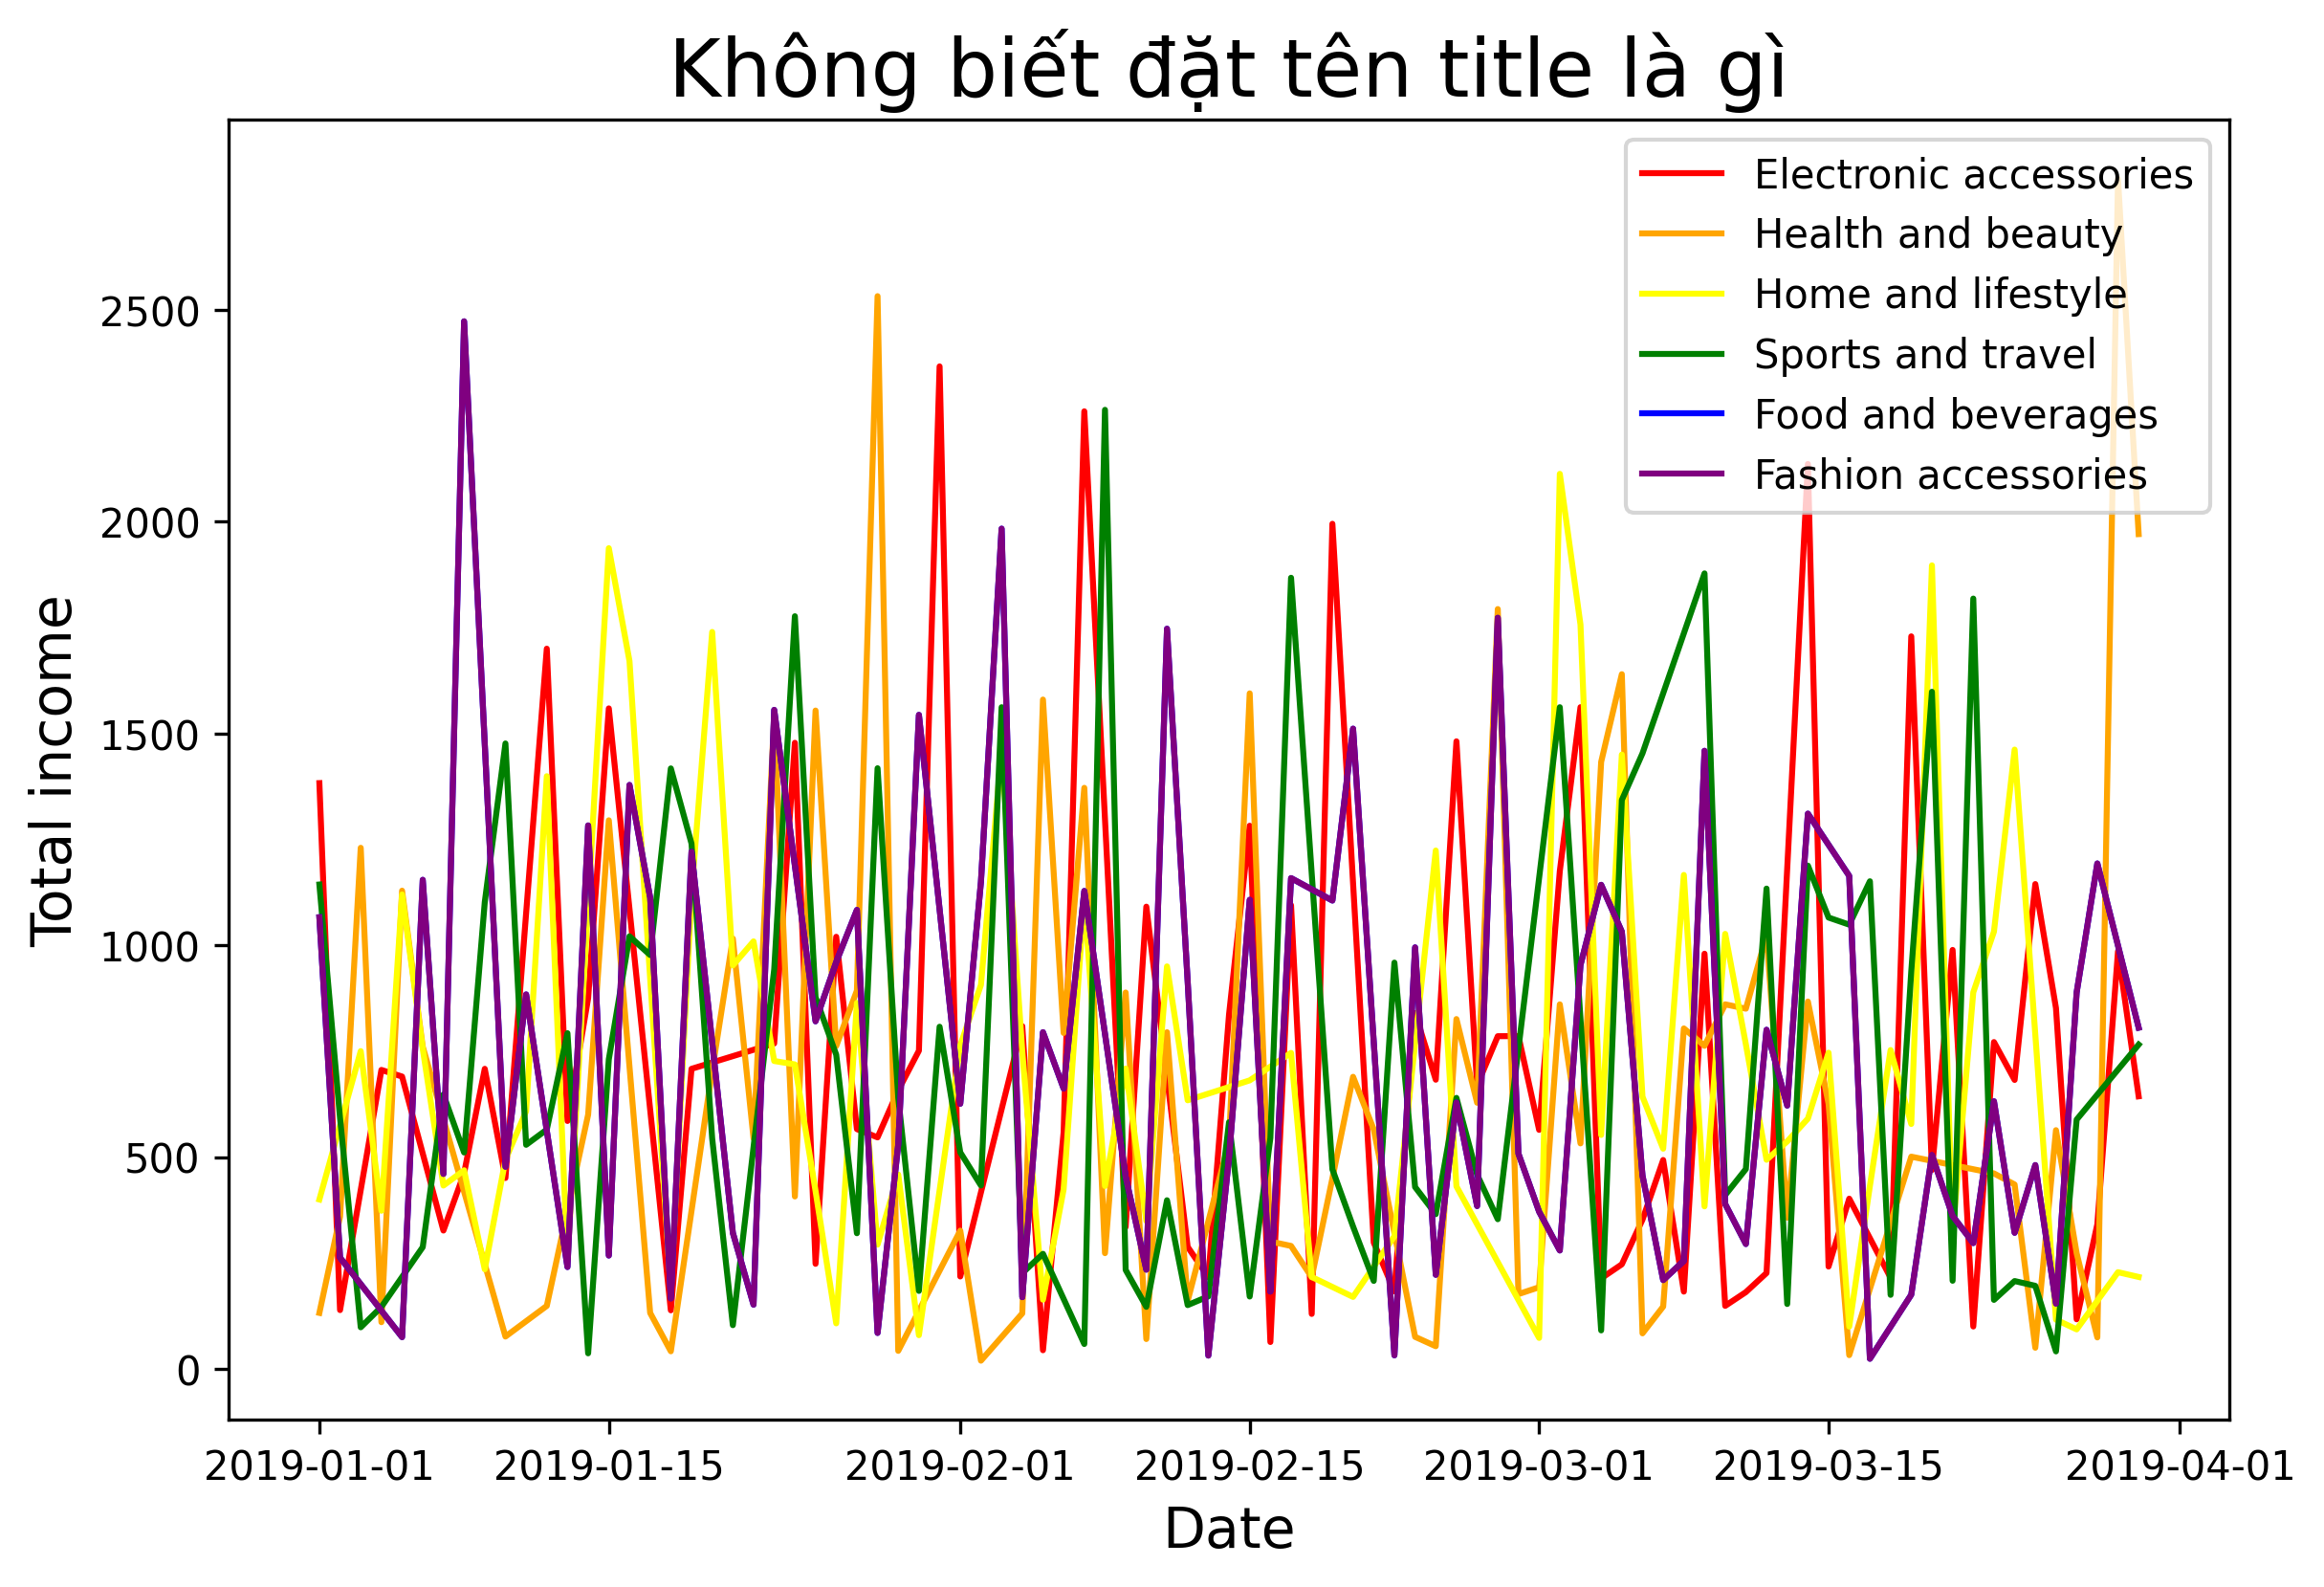

In [25]:
# Vẽ biểu đồ đường
plt.figure(figsize = (9,6), dpi = 300)

plt.plot(x1, y1, label = "Electronic accessories", color = "red")
plt.plot(x2, y2, label = "Health and beauty", color = "orange")
plt.plot(x3, y3, label = "Home and lifestyle", color = "yellow")
plt.plot(x4, y4, label = "Sports and travel", color = "green")
plt.plot(x5, y5, label = "Food and beverages", color = "blue")
plt.plot(x6, y6, label = "Fashion accessories", color = "purple")

plt.title("Không biết đặt tên title là gì", fontsize = 20)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Total income", fontsize = 14)
plt.legend()
plt.show()

Ahihi, 7 sắc cầu vồng. Không biết nhận xét sao

# 3. Thống kê lượng tiền qua các hình thức thanh toán

In [26]:
df.Payment.unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [27]:
new_df = df.loc[:, ["Total", "Payment"]]

In [28]:
new_df.head()

,Total,Payment
0,548.9715,Ewallet
1,80.2200,Cash
2,340.5255,Credit card
3,489.0480,Ewallet
4,634.3785,Ewallet


In [30]:
final_df = new_df.groupby(df.Payment).sum()
final_df

,Total
Payment,
Cash,112206.570
Credit card,100767.072
Ewallet,109993.107


In [31]:
y = final_df.Total
my_labels = final_df.index.get_level_values(0)

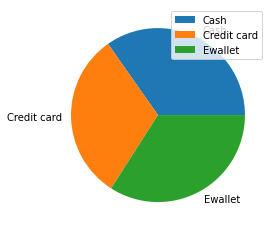

In [33]:
plt.pie(y, labels = my_labels)
plt.legend()
plt.show()

    Nhận xét:
        - Không có hình thức thanh toán nào chiếm ưu thế
        - Chua
        - Nhớ chuẩn bị tiền lẻ để phụ lại khách trả bằng tiền mặt
        - Mua thêm máy cà thẻ để cho khách thanh toán bằng thẻ
        - Và nhớ đăng ký VN pay để khách thanh toán bằng Mobile Banking